**Grupo 11 - Algoritmos e Data Science**

Emanuel Luz de Abreu<br>
Leidiana de Carli<br>
Lissandra Dutra<br>
Vinícius Silva Salinas

#### **Business Understanding**

*Turnover* ou rotatividade de mão-de-obra em uma companhia é caracterizado pelo fluxo de entradas e saídas de pessoas em uma organização. Dependendo da taxa que este indicador representa, outros indicadores como grau de satisfação de funcionários, custos com admissão e demissão dos mesmos, treinamentos aplicados e até mesmo a satisfação de clientes tem seus resultados diretamente influenciados.  

Através do website Kaggle (*https://www.kaggle.com/kmldas/hr-employee-data-descriptive-analytics*) foi obtido o dataset "HR Employee Analytics". Os atributos e registros presentes no mesmo serão analisados e utilizados em um **algoritmo de regressão** de forma a prever o nível de satisfação de colaboradores da empresa contemplatada mediante a variável alvo cujos valores vão de 0 (não satisfeitos) a 1 (satisfeitos).

#### **Data Understanding**

Os dados utilizados foram disponibilizados na plataforma Kaggle pelo usuário Kamal Das. A base refere-se a dados do setor de recursos humanos da empresa MNC e podem ser encontrados no link disponibilizado no tópico acima.

A base é composta de 1 arquivo com 14599 registros e encontra-se no formato xlsx. Os dados estão distribuídos em 11 colunas, que correspondem a:

**`Emp_Id`:** um código de identificação único atribuído a cada funcionário, composto de 3 letras e 5 números

**`satisfaction_level`:** um número de 0 a 1 que expressa em porcentagem o nível de satisfação de cada funcionário, sendo 1 muito satisfeito e 0 insatisfeito

**`last_evaluation`:** um número de 0 a 1 que expressa o tempo em anos desde a última avaliação

**`number_project`:** o número de projetos em que um funcionário está trabalhando

**`average_montly_hours`:** a média de horas trabalhadas nos últimos três meses

**`time_spend_company`:** tempo que o funcionário leva se deslocando para o escritório em horas

**`Work_accident`:** se o funcionário se envolveu em um acidente de trabalho, sendo 0 para não e 1 para sim

**`left`:** se o funcionário já deixou a empresa, sendo 0 para não e 1 para sim

**`promotion_last_5years`:** se o funcionário foi promovido nos últimos 5 anos, sendo 0 para não e 1 para sim

**`Department`:** departamento em que o funcionários está trabalhando

**`salary`:** salário categorizado em low, medium e high



In [ ]:
# Importação de bibliotecas
import pandas as pd

In [ ]:
# Leitura dos dados
dados = pd.read_excel ('HR_Employee_Data.xlsx')

**Explorando os dados**

In [ ]:
# Verificando os tipos de dados
dados.dtypes

Emp_Id                    object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
# Quantidade de linhas e colunas
dados.shape

(14999, 11)

In [ ]:
# Resumo estatítico dos dados
print(dados.describe())

       satisfaction_level  last_evaluation  ...          left  promotion_last_5years
count        14999.000000     14999.000000  ...  14999.000000           14999.000000
mean             0.612834         0.716102  ...      0.238083               0.021268
std              0.248631         0.171169  ...      0.425924               0.144281
min              0.090000         0.360000  ...      0.000000               0.000000
25%              0.440000         0.560000  ...      0.000000               0.000000
50%              0.640000         0.720000  ...      0.000000               0.000000
75%              0.820000         0.870000  ...      0.000000               0.000000
max              1.000000         1.000000  ...      1.000000               1.000000

[8 rows x 8 columns]


In [ ]:
# Média do grau de satisfação
dados["satisfaction_level"].mean()

0.6128335222348166

In [ ]:
# Menor grau de satisfação
dados["satisfaction_level"].min()

0.09

In [ ]:
# Maior grau de satisfação
dados["satisfaction_level"].max()

1.0

In [ ]:
# Desvio padrão dos valores de grau de satisfação
dados["satisfaction_level"].std()

0.2486306510611418

In [ ]:
# Média de tempo desde a última avaliação
dados["last_evaluation"].mean()

0.7161017401159978

In [ ]:
# Verificando o número de promoções nos últimos 5 anos
dados["promotion_last_5years"].sum()

319

In [ ]:
# Análise de correlações entre variáveis 
pd.crosstab(dados["salary"],dados["promotion_last_5years"],margins=True)

promotion_last_5years,0,1,All
salary,,,
high,1165,72,1237
low,7250,66,7316
medium,6265,181,6446
All,14680,319,14999


In [ ]:
# Análise de correlações entre variáveis 
pd.crosstab(dados["number_project"],dados["promotion_last_5years"],margins=True)

promotion_last_5years,0,1,All
number_project,,,
2,2351,37,2388
3,3960,95,4055
4,4248,117,4365
5,2711,50,2761
6,1154,20,1174
7,256,0,256
All,14680,319,14999


**Qualidade dos dados**

In [ ]:
# Verificando se há campos nulos
dados.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# Importação de mais bibliotecas
!pip install seaborn --upgrade
import seaborn as sns
import numpy as np

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


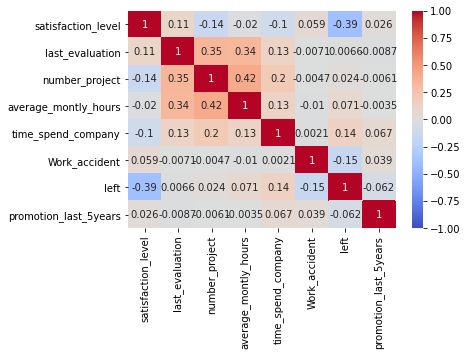

In [ ]:
# Análise de Correlação por Mapa de Calor

sns.heatmap(dados.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
# Correlação pelo coeficiente de Pearson da Satisfação VS Promoção nos Últimos 5 Anos

satisfaction = dados["satisfaction_level"]
promotion = dados["promotion_last_5years"]
correlation_A = satisfaction. corr(promotion)
print(correlation_A)

0.025605185709040166


In [ ]:
# Correlação pelo coeficiente de Pearson da Satisfação VS Número de Projetos
numero_projetos = dados["number_project"]
satisfaction = dados["satisfaction_level"]
correlation_B = numero_projetos. corr(satisfaction)
print(correlation_B)


-0.14296958603689963


#### **Data Preparation**

In [ ]:
# Remoção de uma das colunas, que atrapalhará o desenvolvimento do modelo de regressão, e é desnecessária para as análises
dados = dados.drop(columns=['Emp_Id'])

In [ ]:
# Padronização dos nomes das colunas e alteração do tipo de duas variáveis qualitativas para 'category'
dados = dados.rename(columns = {'Work_accident':'work_accident','Department':'department'})
dados['department'] = dados['department'].astype('category')
dados['salary'] = dados['salary'].astype('category')
dados.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
department               category
salary                   category
dtype: object

In [ ]:
# Visualização dos dados tratados
dados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Entendendo variáveis dummies
dados['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
# Entendendo variáveis dummies
dados['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#### **One Hot Encoder**<br>
Necessário para uso da variável qualitativa nominal `department` no modelo

In [ ]:
# Instalação de um módulo a ser utilizado
!pip install category_encoders

     |████████████████████████████████| 81kB 4.1MB/s 


In [ ]:
# Transformando a coluna department
from category_encoders.one_hot import OneHotEncoder
enc = OneHotEncoder(cols=['department'], use_cat_names=True)
dados = enc.fit_transform(dados)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# Visualizando o resultado
dados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_sales,department_accounting,department_hr,department_technical,department_support,department_management,department_IT,department_product_mng,department_marketing,department_RandD,salary
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,0,0,low
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,0,0,medium
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,0,0,medium
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,0,0,low
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,0,0,low


#### **Ordinal Encoder**<br>
Necessário para uso da variável qualitativa ordinal `salary` no modelo

In [ ]:
# Transformando a coluna salary
from category_encoders.one_hot import OrdinalEncoder
enc = OrdinalEncoder(cols=['salary'])
dados = enc.fit_transform(dados)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# Visualizando o resultado
dados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_sales,department_accounting,department_hr,department_technical,department_support,department_management,department_IT,department_product_mng,department_marketing,department_RandD,salary
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,0,0,2
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,0,0,2
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1


#### **Modeling**

Variável alvo: satisfaction_level

In [ ]:
# Separando as variáveis entre preditoras e alvo
alvo = dados['satisfaction_level']
pred = dados.drop('satisfaction_level', axis = 1)

In [ ]:
# Criando os conjuntos de dados de treino e teste
from sklearn.model_selection import train_test_split

pred_treino, pred_teste, alvo_treino, alvo_teste = train_test_split(pred, alvo, test_size = 0.2)

In [ ]:
# Criação do modelo
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_estimators=100)
mdl.fit(pred_treino, alvo_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Analisando a importância de cada variável preditora para a geração de valor da variável alvo
mdl.feature_importances_

array([0.1483042 , 0.35735947, 0.19219647, 0.07278902, 0.01720262,
       0.07563951, 0.00416467, 0.01662832, 0.00781849, 0.00710415,
       0.01357627, 0.01319564, 0.00567592, 0.01033589, 0.00878181,
       0.00813481, 0.00836327, 0.03272947])

In [ ]:
# Aplicação do modelo para o conjunto de dados teste
previsoes = mdl.predict(pred_teste)
previsoes

array([0.6829, 0.6702, 0.7681, ..., 0.3643, 0.8467, 0.6258])

#### **Evaluation**

In [ ]:
# Avaliação do modelo com MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(alvo_teste, previsoes)

0.11892857369047619

In [ ]:
# Verificação e comparação dos resultados dos três primeiros registros do conjunto de dados teste
previsoes[0:3]

array([0.6829, 0.6702, 0.7681])

In [ ]:
alvo_teste[0:3]

10953    0.66
8391     0.65
9966     0.74
Name: satisfaction_level, dtype: float64

In [ ]:
# Aplicação do modelo em valores que o usuário pode definir livremente
previsao_amostras = mdl.predict([[0.63,4,135,2,1,0,0,1,0,0,0,0,0,0,0,0,0,3]])
previsao_amostras

array([0.7635])

#### **Final Conclusion**

O conjunto de dados utilizado para estudo se mostrou de  boa qualidade, no qual não foi necessário grandes intervenções para tratar a base e limpar registros inválidos. Na etapa de limpeza não foram identificadas anomalias, como valores nulos ou inconsistentes, ou ainda discrepâncias que poderiam comprometer a análise como um todo, foram feitos pequenos ajustes como a exclusão do campo `Emp_Id` que identifica um funcionário mas não influenciaria a análise.

Em relação aos negócios, algumas questões foram analisadas, como:

Existe alguma relação entre a  satisfação  de um funcionário com o número de 
projetos executados?

Nessa questão foi identificada uma correlação negativa, ou seja, a satisfação de um funcionário está, de maneira inversamente proporcional, relacionada ao número de projetos, nos dando algumas ideias que podem ser exploradas pelo setor de Recursos Humanos da empresa, como: esta baixa satisfação do funcionário pode estar ligada à uma sobrecarga de trabalho gerando assim uma insatisfação e por consequência, em uma próxima análise, uma baixa qualidade de serviço.

Outra questão analisada foi: existe correlação entre a satisfação de um funcionário com o fato dele ser ou não promovido nos últimos 5 anos?

Nesse caso, tivemos uma correlação positiva, mas não tão satisfatória como prevíamos, pois obtivemos um índice relativamente baixo, igual a 0.025. Este valor obtido  significa que não existe um único fator decisivo nessa amostra de dados, e sim uma combinação de variáveis que contribui para a satisfação do funcionário.

Por ultimo, concluímos que o algoritmo desenvolvido pode **auxiliar tomadores de decisão a planejar políticas de RH** visando o aumento dos índices de satisfação de colaboradores, tempo de empresa, e redução de turn-over. Com as  análises geradas por esse algoritmo também é possível auxiliar no planejamento de políticas de recrutamento e a melhoria contínua dos profissionais da companhia.